In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [6]:
iris = load_iris()
X, y = iris.data, iris.target
n_samples = X.shape[0]

In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

1.0

In [9]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(classifier, X, y)
print(scores)

[ 0.98039216  0.98039216  1.        ]


In [10]:
np.mean(scores)

0.98692810457516345

In [11]:
cross_val_score(classifier, X, y, cv=5)

array([ 0.96666667,  1.        ,  0.93333333,  0.96666667,  1.        ])

In [12]:
from sklearn.cross_validation import KFold, StratifiedKFold, ShuffleSplit,LeavePLabelOut

In [13]:
cv = StratifiedKFold(iris.target, n_folds=5)
for train, test in cv:
    print(test)

[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]


In [14]:
def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    plt.matshow(masks)

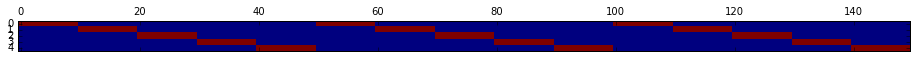

In [15]:
cv = StratifiedKFold(y, n_folds=5)
plot_cv(cv, n_samples)